In [1]:
%%time
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import pickle
%matplotlib inline

Wall time: 2.42 s


## Gaussian transformation sklearn

In [2]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


Wall time: 0 ns


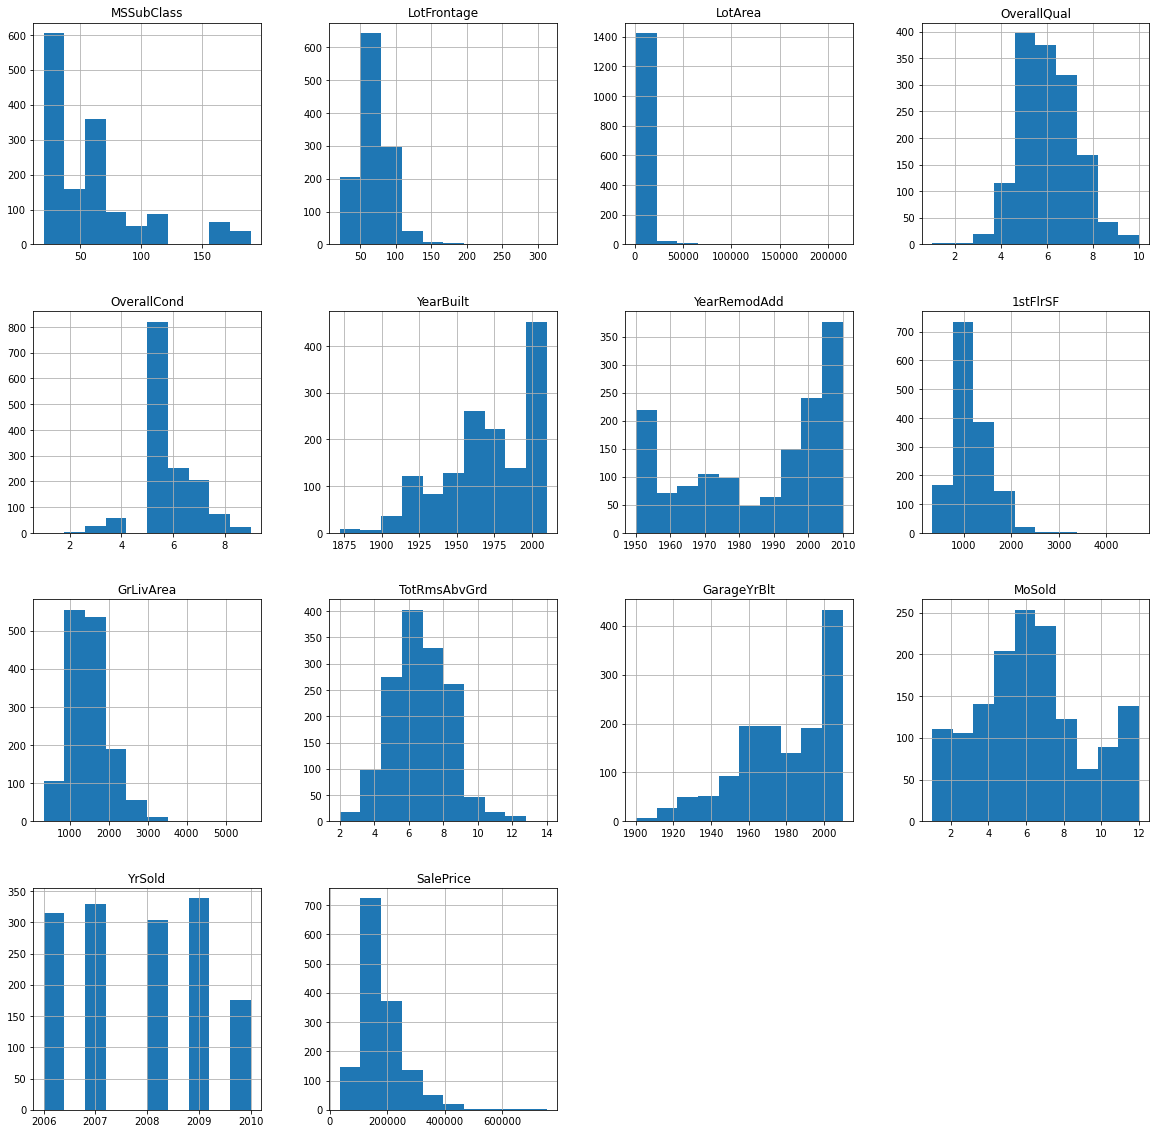

In [3]:
%time
# let's explore the distribution of the numerical variables
df[cols].hist(figsize=(20,20))
plt.show()

In [4]:
import scipy.stats as stats

# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Logarithmic transformation

In [5]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [6]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

# create a log transformer
transformer = FunctionTransformer(np.log, validate=True)

# transform all the numerical and positive variables
df_t = transformer.transform(df[cols].fillna(1))

# Scikit-learn returns NumPy arrays, so capture in dataframe, note that Scikit-learn will return an array with
df_t = pd.DataFrame(df_t, columns=cols)

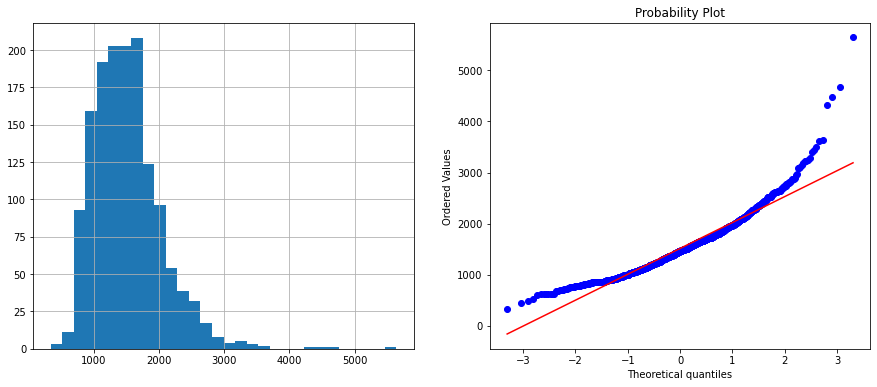

In [7]:
# original distribution
diagnostic_plots(df, 'GrLivArea')

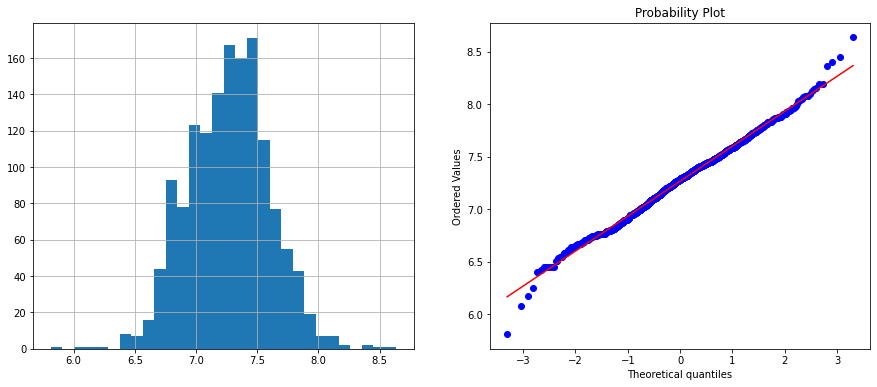

In [8]:
# transformed distribution
diagnostic_plots(df_t, 'GrLivArea')

### Reciprocal transformation

In [9]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [10]:
# create the transformer
transformer = FunctionTransformer(lambda x: 1/x, validate=True)
# transformer = FunctionTransformer(np.reciprocal, validate=True)

# transform the positive variables
df_t = transformer.transform(df[cols].fillna(1))

# re-capture in a dataframe
df_t = pd.DataFrame(df_t, columns=cols)

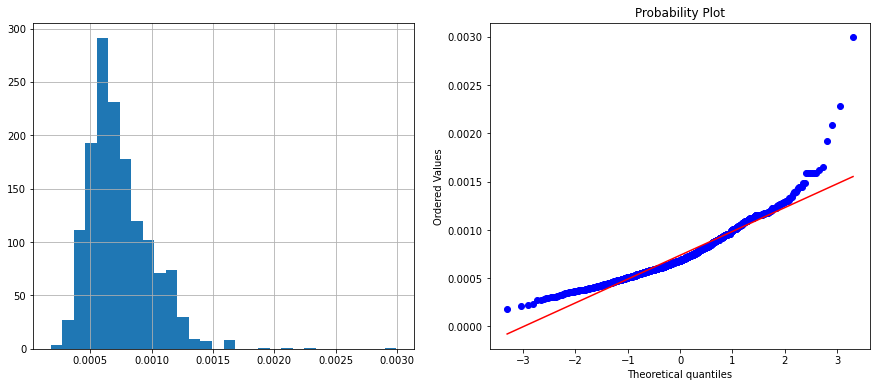

In [11]:
# transformed variable
diagnostic_plots(df_t, 'GrLivArea')

### Square root transformation

In [12]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [13]:
transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)
# transformer = FunctionTransformer(np.sqrt, validate=True)

df_t = transformer.transform(df[cols].fillna(1))

df_t = pd.DataFrame(df_t, columns=cols)

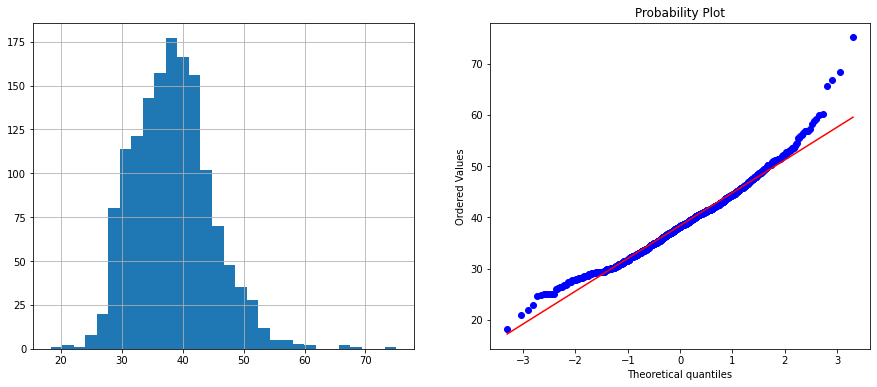

In [14]:
# transformed variable
diagnostic_plots(df_t, 'GrLivArea')

### Exponential transformation

In [15]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [16]:
transformer = FunctionTransformer(lambda x: x**(1/1.2), validate=True)

df_t = transformer.transform(df[cols].fillna(1))

df_t = pd.DataFrame(df_t, columns=cols)

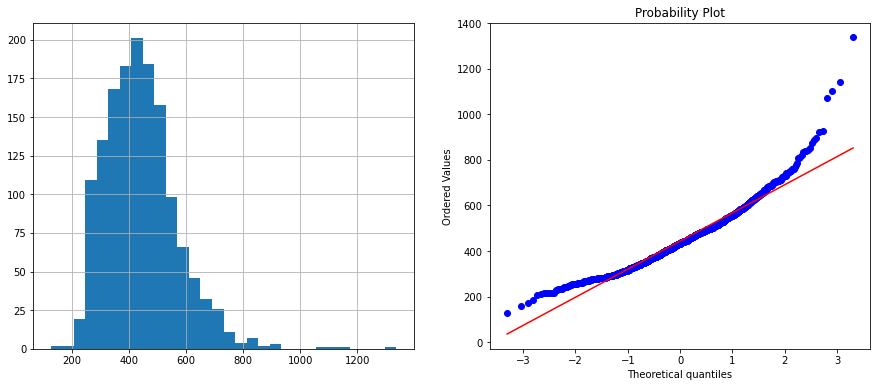

In [17]:
# transformed variable
diagnostic_plots(df_t, 'GrLivArea')

### Box-Cox transformation
* Box-Cox and Yeo-Johnson transformations need to learn their parameters from the data. Let's divide the dataset into train and test set.

In [18]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [19]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )
X_cols = X.columns

In [20]:
# create the transformer
transformer = PowerTransformer(method='box-cox', standardize=False)

# fit on X_train then transform on X_test
X_train_t = transformer.fit_transform(X_train[X_cols].fillna(1))
X_test_t = transformer.transform(X_test[X_cols].fillna(1))

# capture data in a dataframe
X_train_t = pd.DataFrame(X_train_t, columns=X_cols)
X_test_t = pd.DataFrame(X_test_t, columns=X_cols)

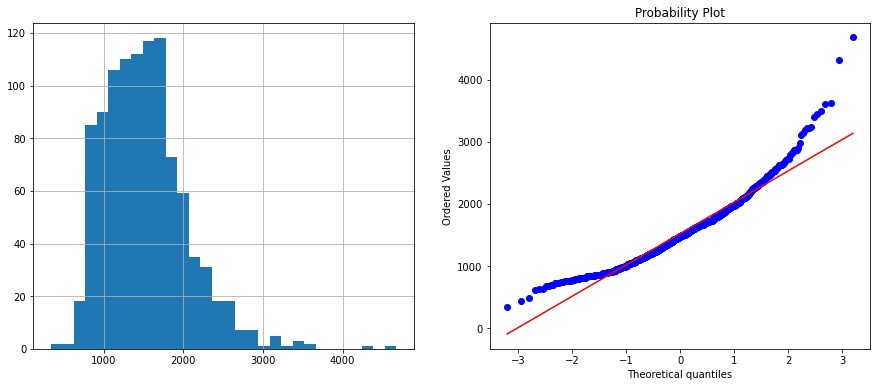

In [21]:
# original distribution
diagnostic_plots(X_train, 'GrLivArea')

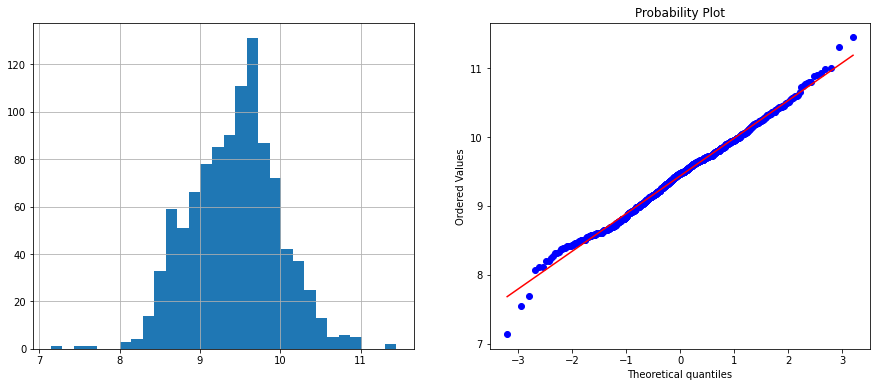

In [22]:
# transformed variable
diagnostic_plots(X_train_t, 'GrLivArea')

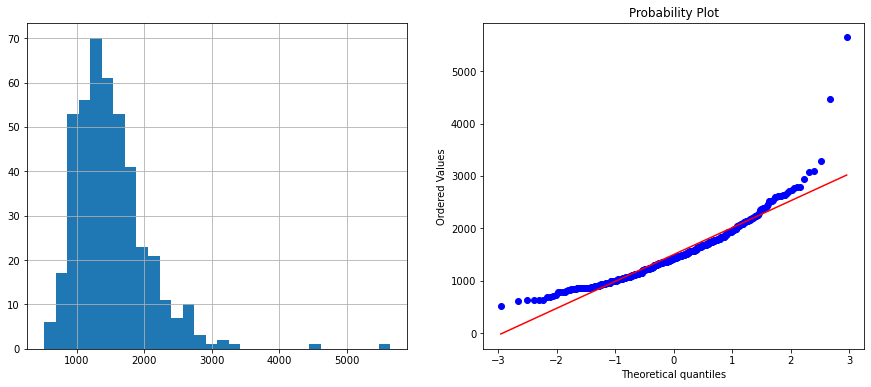

In [23]:
# original distribution
diagnostic_plots(X_test, 'GrLivArea')

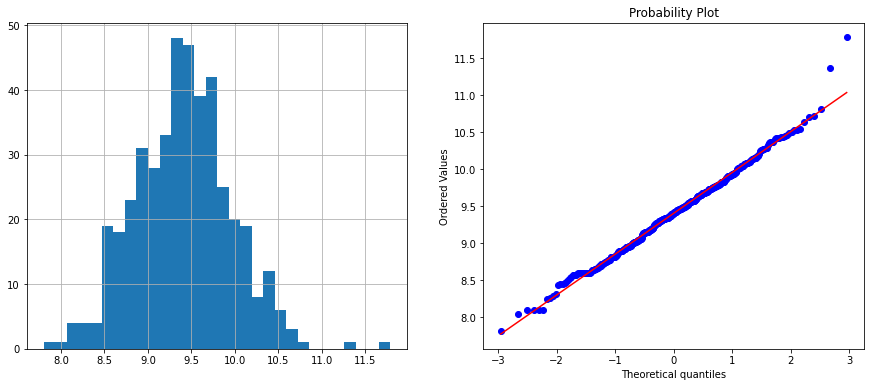

In [24]:
# transformed variable
diagnostic_plots(X_test_t, 'GrLivArea')

### Yeo Johnson
* Yeo-Johnson is an adaptation of Box-Cox that can also be used in negative value variables.

In [25]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [26]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )
X_cols = X.columns

In [27]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# fit on X_train then transform on X_test
X_train_t = transformer.fit_transform(X_train[X_cols].fillna(1))
X_test_t = transformer.transform(X_test[X_cols].fillna(1))

# capture data in a dataframe
X_train_t = pd.DataFrame(X_train_t, columns=X_cols)
X_test_t = pd.DataFrame(X_test_t, columns=X_cols)

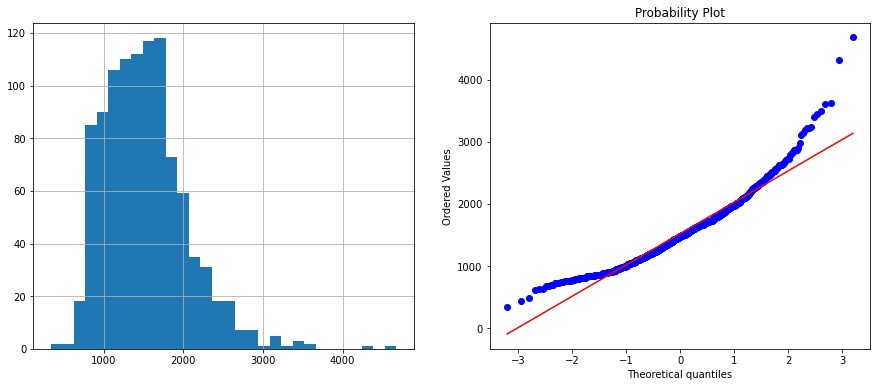

In [28]:
# original distribution
diagnostic_plots(X_train, 'GrLivArea')

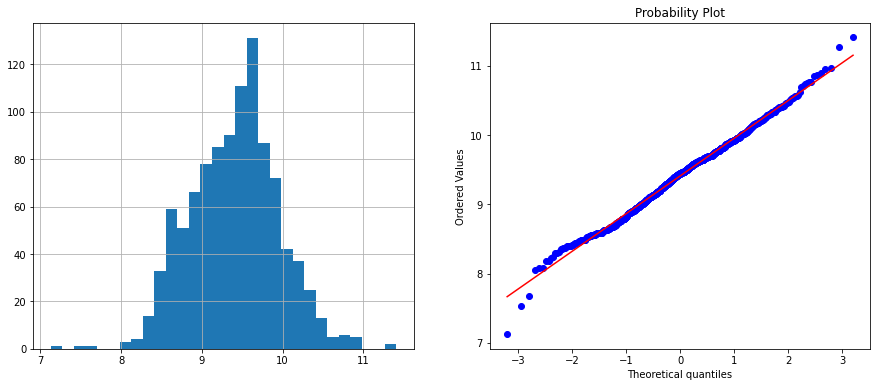

In [29]:
# transformed variable
diagnostic_plots(X_train_t, 'GrLivArea')

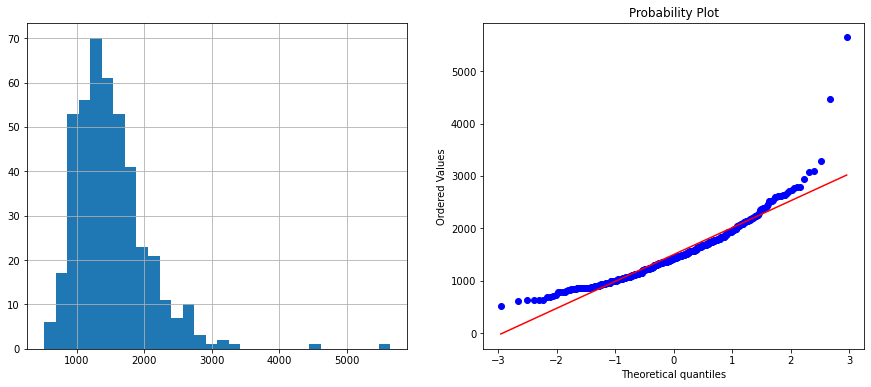

In [30]:
# original distribution
diagnostic_plots(X_test, 'GrLivArea')

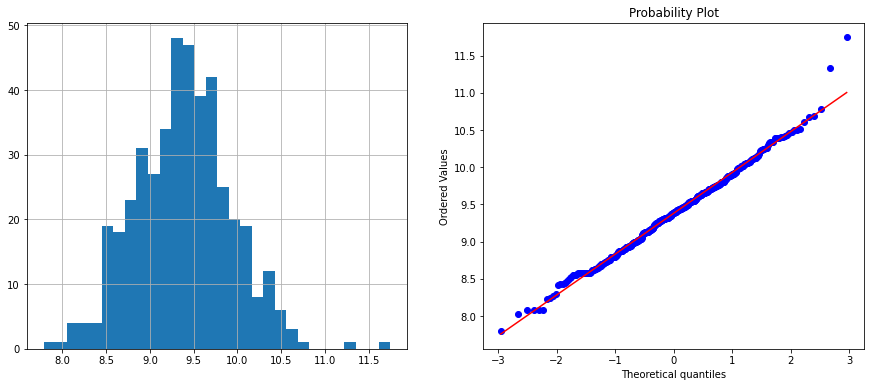

In [31]:
# transformed variable
diagnostic_plots(X_test_t, 'GrLivArea')

### Gaussian transformation (Feature Engine)

In [32]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### LogTransformer (Feature Engine)

In [33]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [34]:
from feature_engine.transformation import LogTransformer

transformer = LogTransformer()

# feature engine returns dataframe
df_t = transformer.fit_transform(df[cols].fillna(1))

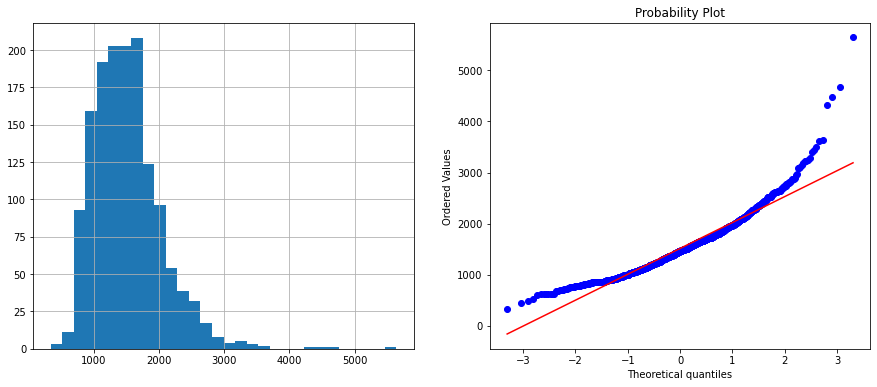

In [35]:
# original distribution
diagnostic_plots(df, 'GrLivArea')

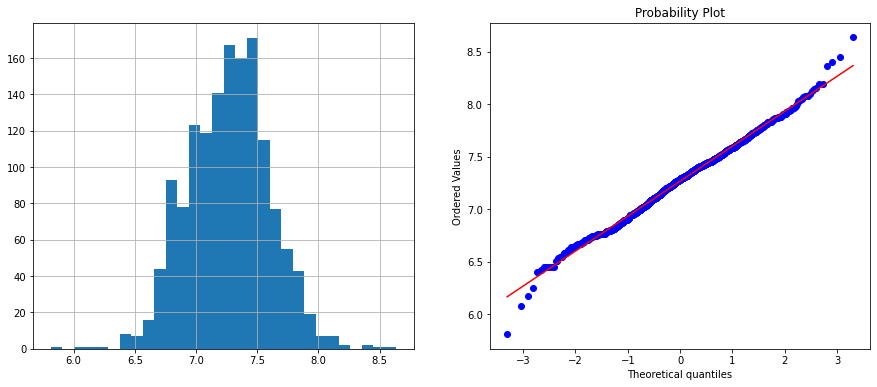

In [36]:
# transformed distribution
diagnostic_plots(df_t, 'GrLivArea')

In [37]:
transformer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

### ReciprocalTransformer (Feature Engine)

In [38]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [39]:
from feature_engine.transformation import ReciprocalTransformer

transformer = ReciprocalTransformer()

# feature engine returns dataframe
df_t = transformer.fit_transform(df[cols].fillna(1))

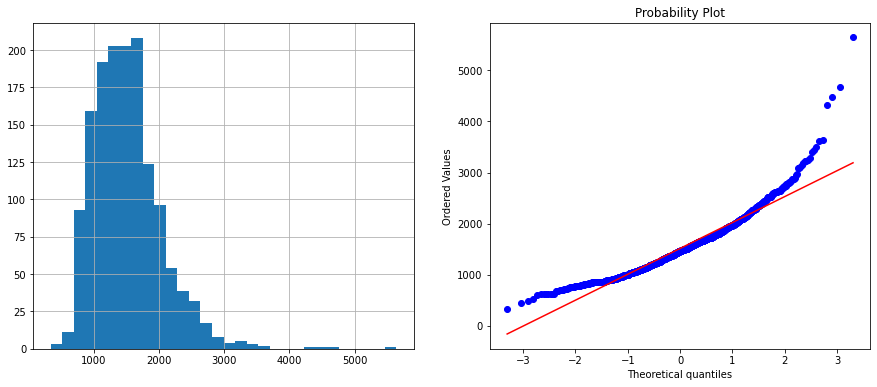

In [40]:
# original distribution
diagnostic_plots(df, 'GrLivArea')

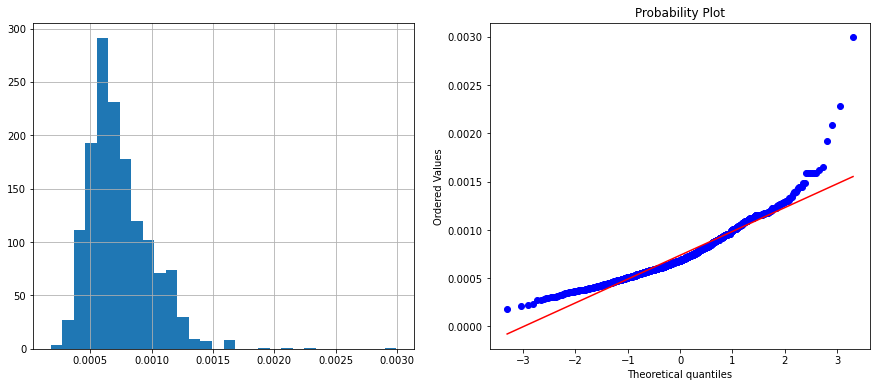

In [41]:
# transformed distribution
diagnostic_plots(df_t, 'GrLivArea')

In [42]:
transformer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

### ExponentialTransformer (Feature Engine)

In [43]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [44]:
from feature_engine.transformation import PowerTransformer

transformer = PowerTransformer()

# feature engine returns dataframe
df_t = transformer.fit_transform(df[cols].fillna(1))

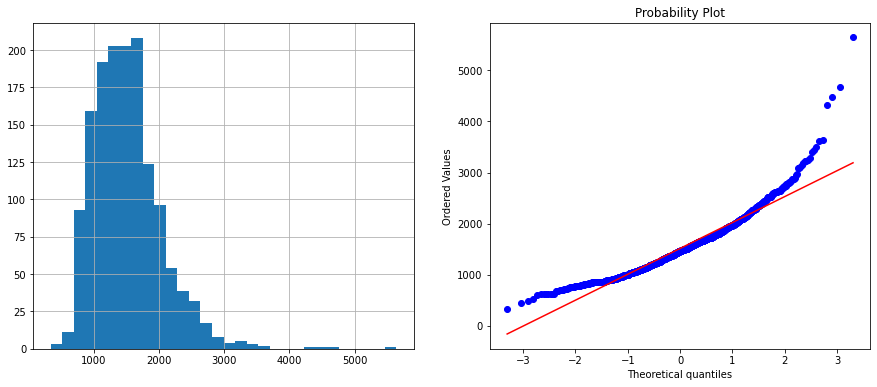

In [45]:
# original distribution
diagnostic_plots(df, 'GrLivArea')

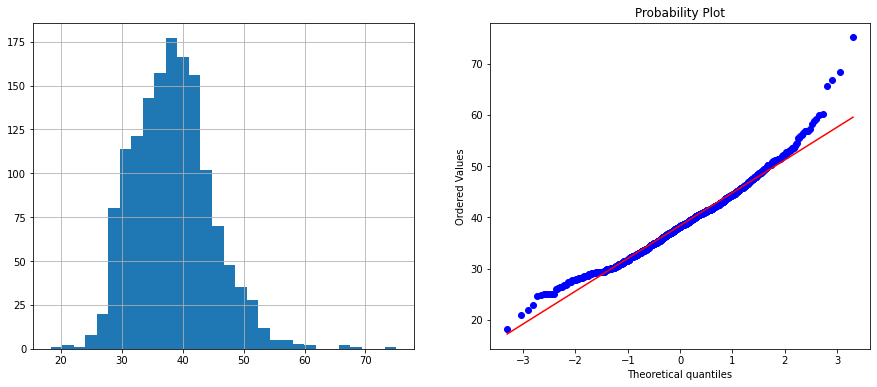

In [46]:
# transformed distribution
diagnostic_plots(df_t, 'GrLivArea')

In [47]:
transformer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'SalePrice']

### BoxCoxTransformer (Feature Engine)

In [48]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [49]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [50]:
from feature_engine.transformation import BoxCoxTransformer

transformer = BoxCoxTransformer()

# fit on X_train then transform on X_test
X_train_t = transformer.fit_transform(X_train[X_cols].fillna(1))
X_test_t = transformer.transform(X_test[X_cols].fillna(1))

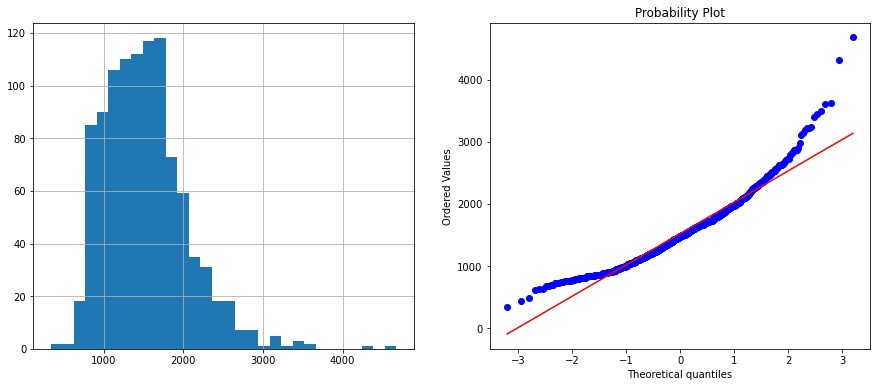

In [51]:
# original distribution
diagnostic_plots(X_train, 'GrLivArea')

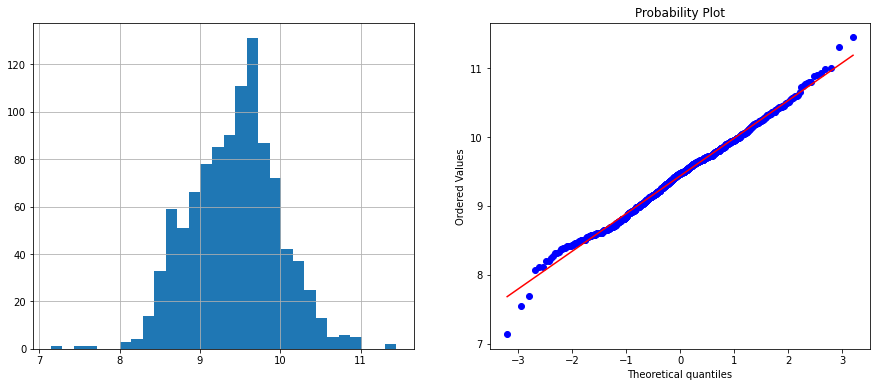

In [52]:
# transformed distribution
diagnostic_plots(X_train_t, 'GrLivArea')

In [53]:
transformer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold']

In [54]:
transformer.lambda_dict_

{'MSSubClass': -0.2191145423599475,
 'LotFrontage': 0.7402359500256631,
 'LotArea': 0.022716974992922984,
 'OverallQual': 0.8992634649492518,
 'OverallCond': 0.5424014994073341,
 'YearBuilt': 22.17967376694301,
 'YearRemodAdd': 39.7624275895359,
 '1stFlrSF': 0.024760203538733927,
 'GrLivArea': 0.06854346283829917,
 'TotRmsAbvGrd': 0.26841547941861493,
 'GarageYrBlt': 2.44796214980221,
 'MoSold': 0.7612559122914727,
 'YrSold': -205.29570834281137}

### Yeo-Johnson Transformer (Feature Engine)

In [55]:
df = pd.read_csv('houseprice.csv')

# Let's select the numerical and positive variables in the dataset for this demonstration.
cols = []
for col in df.columns:
    if df[col].dtypes != 'O' and col != 'Id':  # if the variable is numerical
        if np.sum(np.where(df[col] <= 0, 1, 0)) == 0:  # if the variable is positive
            cols.append(col)  # append variable to the list

df = df[cols]
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,1710,8,2003.0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,1262,1262,6,1976.0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,920,1786,6,2001.0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,961,1717,7,1998.0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,1145,2198,9,2000.0,12,2008,250000


In [56]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True, 
#                                                     stratify=y # Not a classification problem
                                                   )

In [57]:
from feature_engine.transformation import YeoJohnsonTransformer

transformer = YeoJohnsonTransformer()

# fit on X_train then transform on X_test
X_train_t = transformer.fit_transform(X_train[X_cols].fillna(1))
X_test_t = transformer.transform(X_test[X_cols].fillna(1))

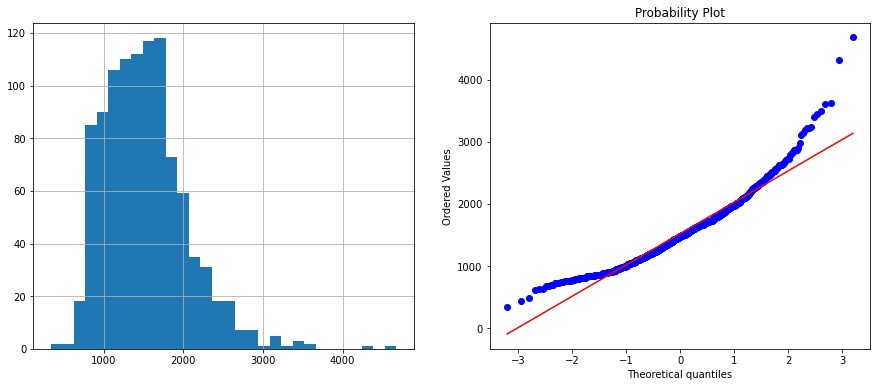

In [58]:
# original distribution
diagnostic_plots(X_train, 'GrLivArea')

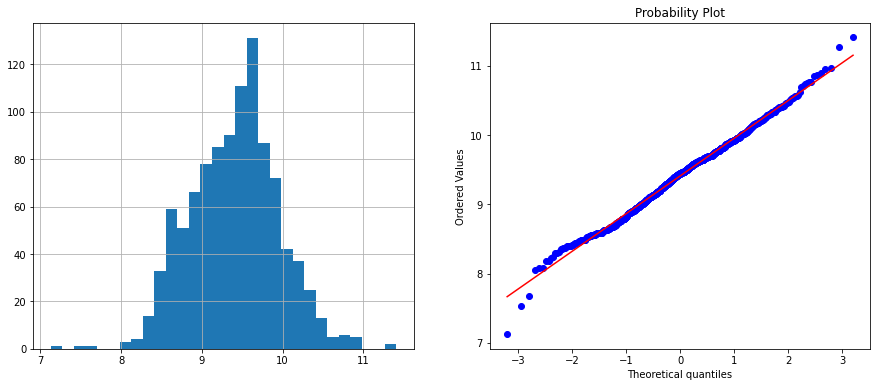

In [59]:
# transformed distribution
diagnostic_plots(X_train_t, 'GrLivArea')

In [60]:
transformer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold']

In [61]:
transformer.lambda_dict_

{'MSSubClass': -0.2378306859381657,
 'LotFrontage': 0.7899046631215981,
 'LotArea': 0.02258978732751055,
 'OverallQual': 0.8643396718133388,
 'OverallCond': 0.3969558337988488,
 'YearBuilt': 22.190602427177428,
 'YearRemodAdd': 39.78218820691653,
 '1stFlrSF': 0.02379301178012459,
 'GrLivArea': 0.06781061353154169,
 'TotRmsAbvGrd': 0.13886712654681466,
 'GarageYrBlt': 2.684077475677206,
 'MoSold': 0.723241223747494,
 'YrSold': -2.72135950034568}